**Citation Request:This dataset is public available for research. The details are described in [Moro et al., 2014].**

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014


**Data Set Information:** The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

**Problem Statement:** The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

## Attribute Information:

   ### Input variables:
    ** bank client data:**
    1 - age (numeric)
    2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5 - default: has credit in default? (categorical: 'no','yes','unknown')
    6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    7 - loan: has personal loan? (categorical: 'no','yes','unknown')
   ### related with the last contact of the current campaign:
    8 - contact: contact communication type (categorical: 'cellular','telephone')
    9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   ### other attributes:
    12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    14 - previous: number of contacts performed before this campaign and for this client (numeric)
    15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
    ## social and economic context attributes
    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    20 - nr.employed: number of employees - quarterly indicator (numeric)

   ### Output variable (desired target):
    21 - y - has the client subscribed a term deposit? (binary: 'yes','no')


# EDA (Exploratory Data Analysis)
#### Importing packages

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor 
%matplotlib inline

#### Loading Dataset

In [2]:
data_path="C:\\Datasets\\MLData\\Banking_subscription\\bank-additional-full.csv"
data=pd.read_csv(data_path,sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
print("Shape of data: ",data.shape)

Shape of data:  (41188, 21)


In [4]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

#### Checking null value in loaded dataset

In [6]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

>**Here, we have no null values. it means we are good to go for further process**

## 1) Univariate Analysis of Categorical Features
### Now we select individual feature and perform analysis on top of that

In [10]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [3]:
# Categorical features
from rav_utils import preprocess_data
categorical_cols=preprocess_data.categorical_column(data)
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [4]:
data_cat=data[categorical_cols]
data_cat.describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [4]:
sns.set()
def countplot(label, dataset):
    plt.figure(figsize=(10,7))
    Y = data[label]
    total = float(len(Y))
    ax=sns.countplot(x=label, data=dataset)
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

    #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
#     ax.yaxis.set_ticks(np.linspace(0, total, 11))
    #adjust the ticklabel to the desired format, without changing the position of the ticks.
#     ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    # ax.legend(labels=["no","yes"])
    plt.show()

In [5]:
def countplot_yn(label, dataset):
    plt.figure(figsize=(10,7))
    Y = data[label]
    total = float(len(Y))
    ax=sns.countplot(x=label, data=dataset,hue='y')
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

    #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
#     ax.yaxis.set_ticks(np.linspace(0, total, 11))
    #adjust the ticklabel to the desired format, without changing the position of the ticks.
#     ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    # ax.legend(labels=["no","yes"])
    plt.show()

job


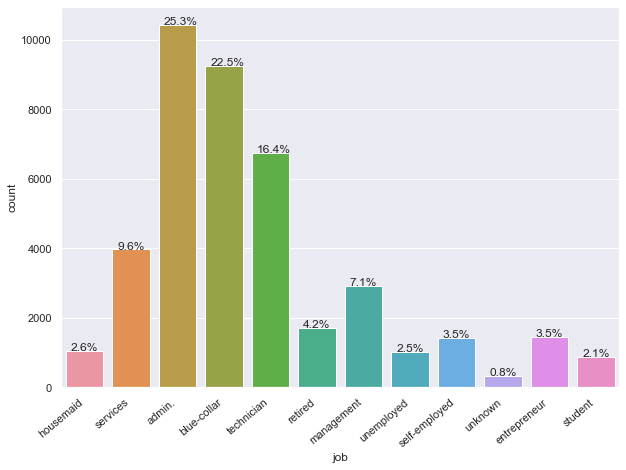

marital


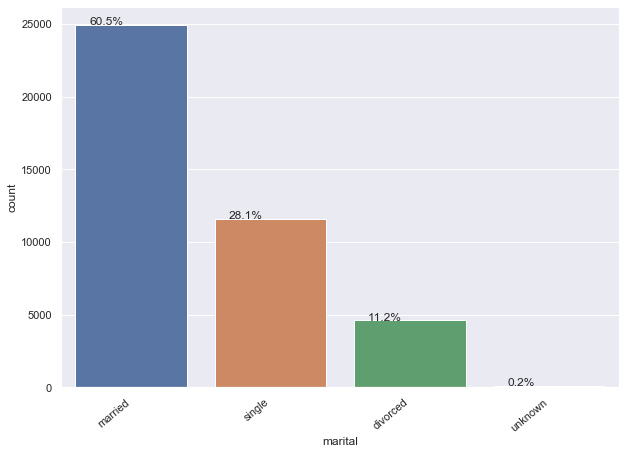

education


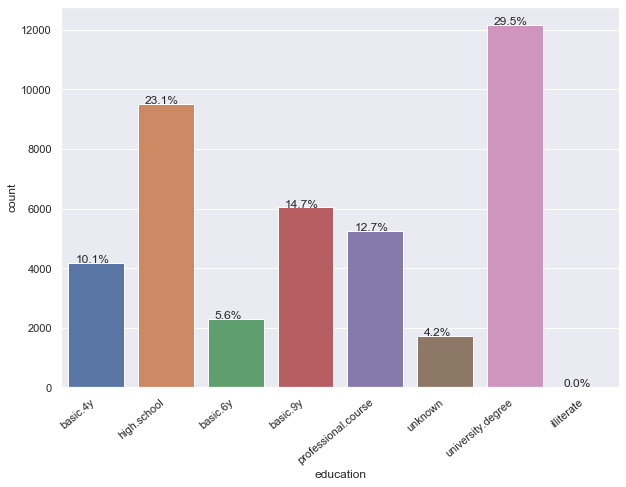

default


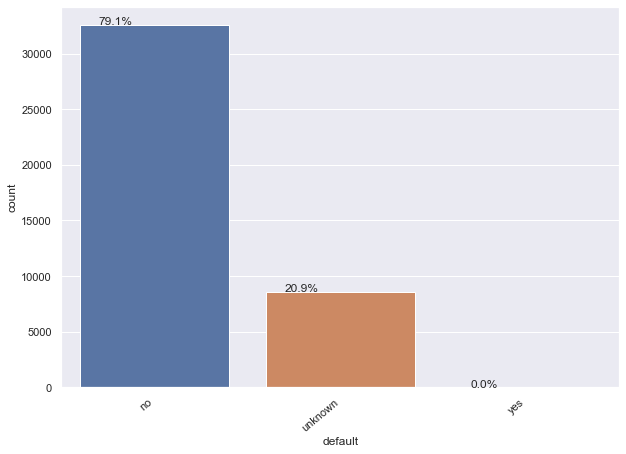

housing


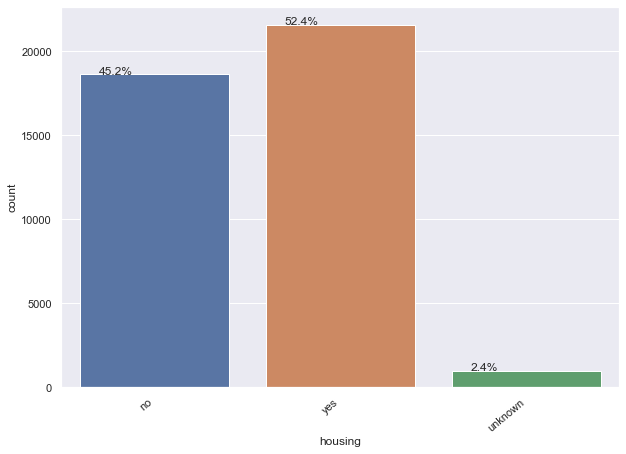

loan


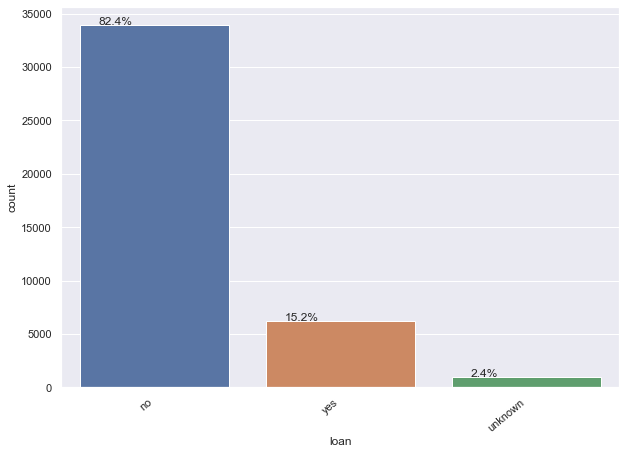

contact


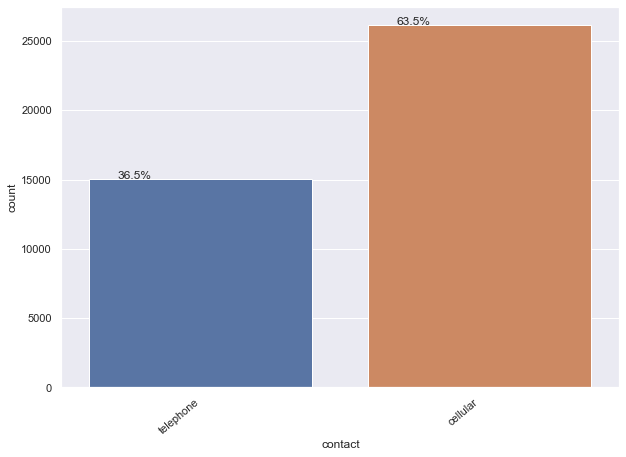

month


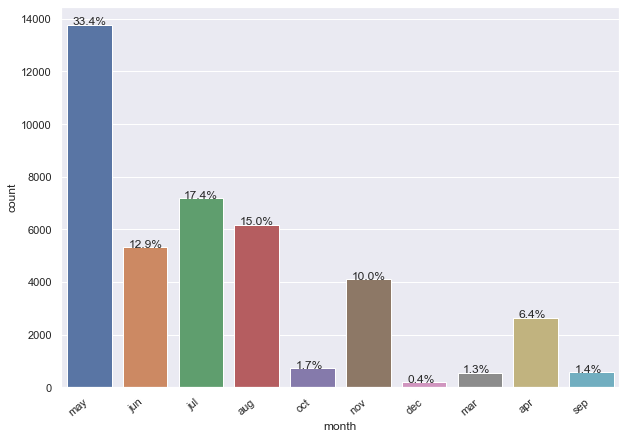

day_of_week


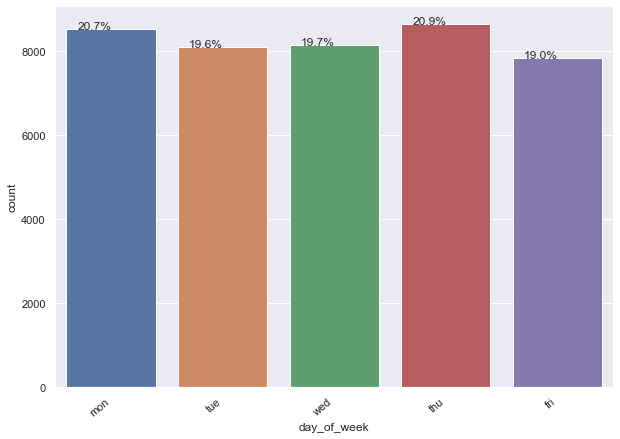

poutcome


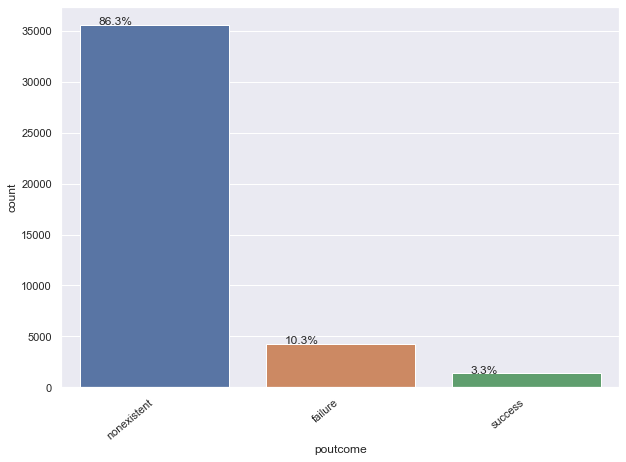

y


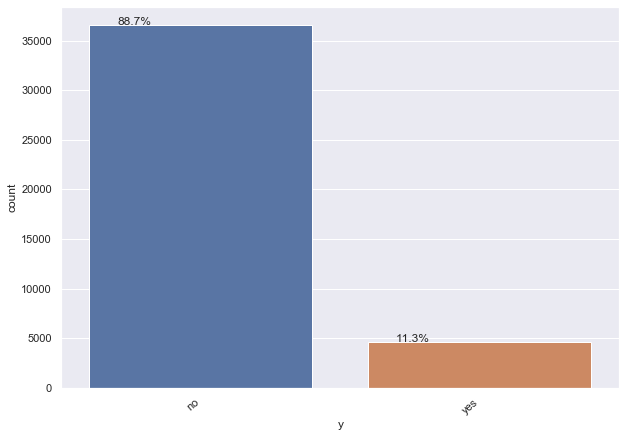

In [33]:
##### To check individually #########
# countplot(categorical_cols[1],data)
####### let's see how data is distributed for every column ###########
# plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cat:
    print(column)
    if plotnumber<=data_cat.shape[1] :
#         ax = plt.subplot(10,1,plotnumber)
        countplot(column,data_cat)
#         sns.distplot(data[column])
#         plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
# plt.show()

job


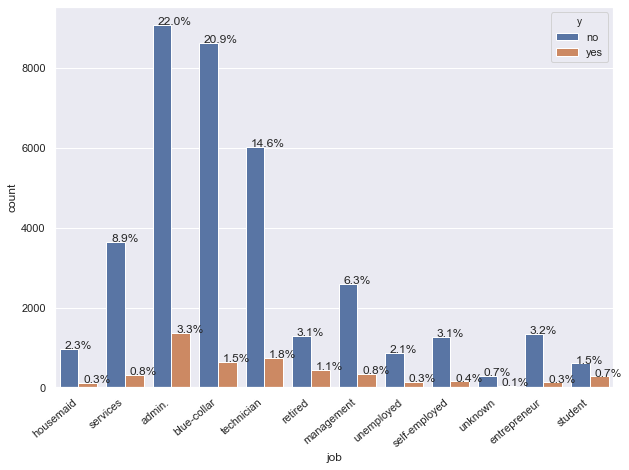

marital


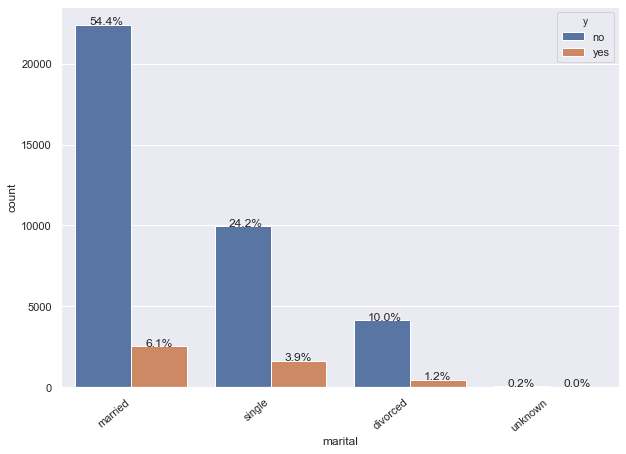

education


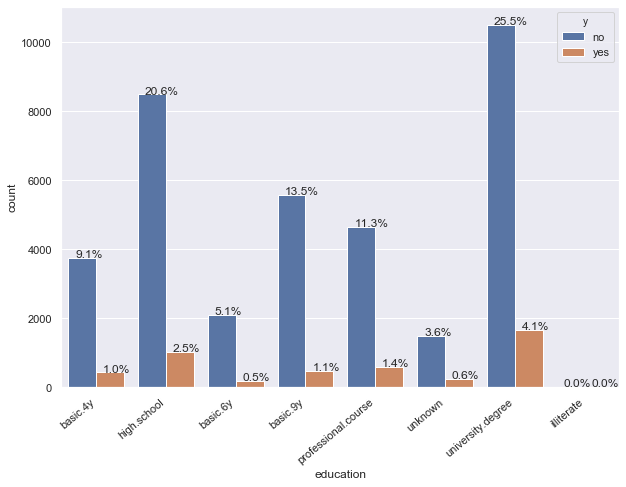

default


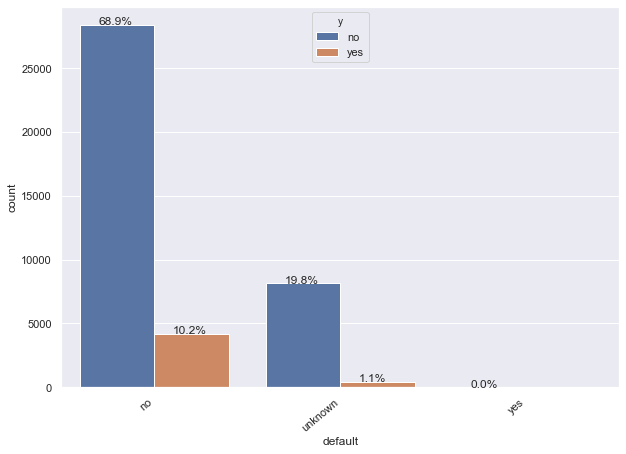

housing


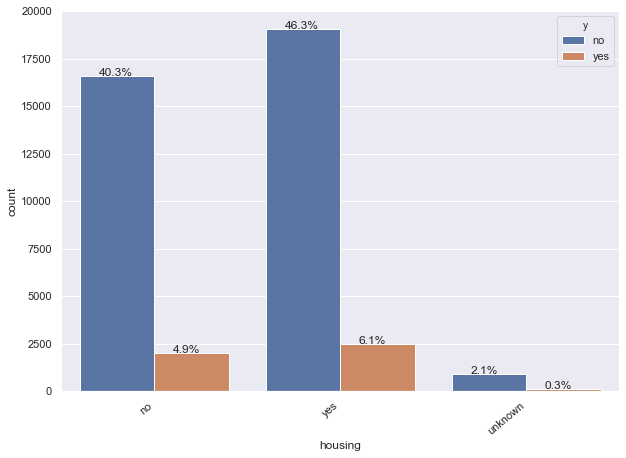

loan


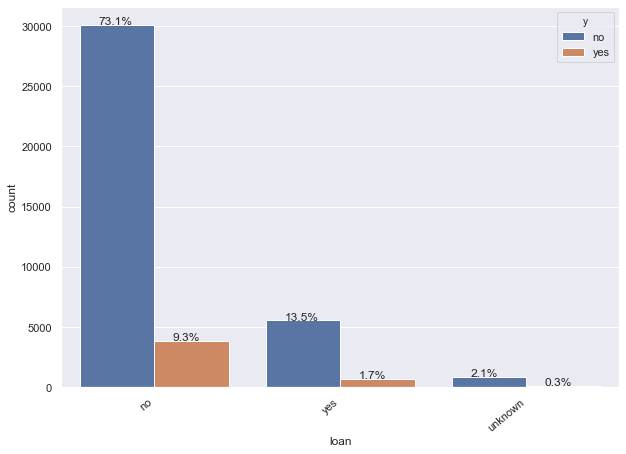

contact


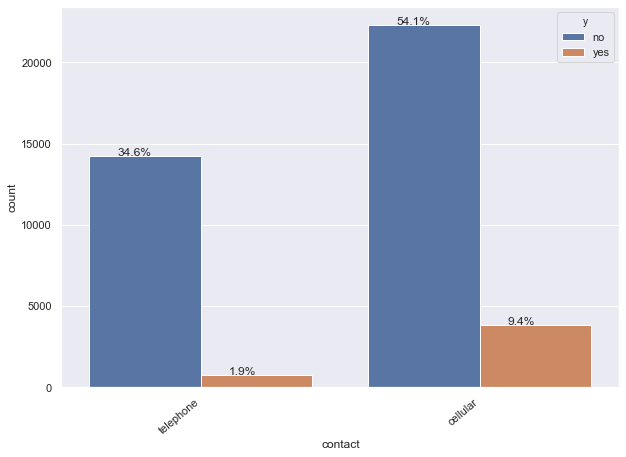

month


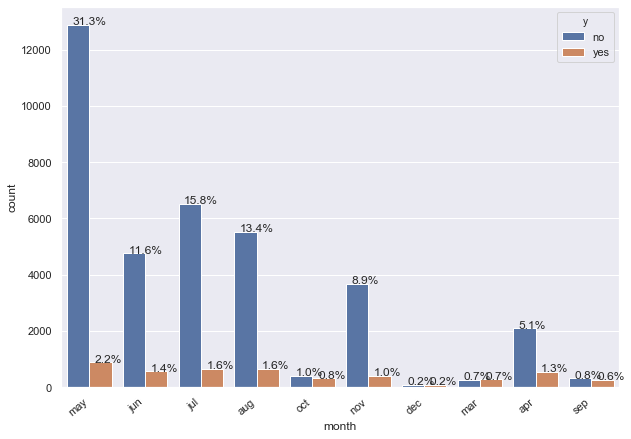

day_of_week


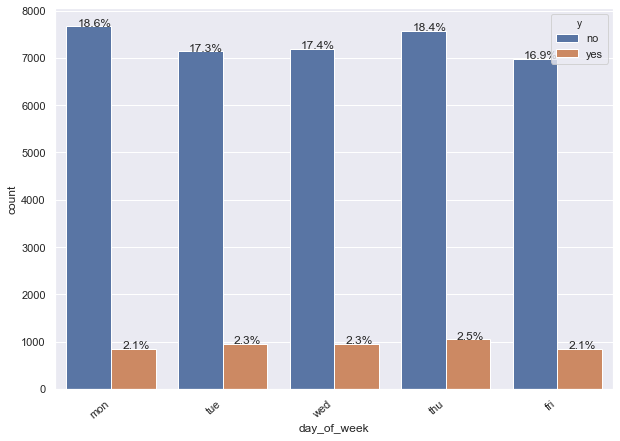

poutcome


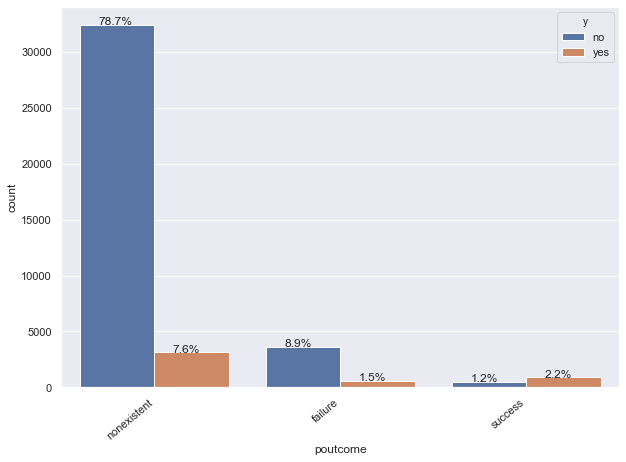

y


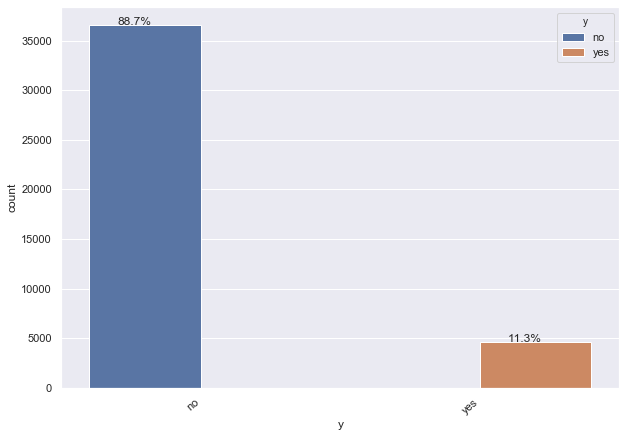

In [34]:
##### To check individually #########
# countplot_yn(categorical_cols[1],data)
##### let's see how data is distributed for every column##########
# plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cat:
    print(column)
    if plotnumber<=data_cat.shape[1] :
#         ax = plt.subplot(10,1,plotnumber)
        countplot_yn(column,data_cat)
#         sns.distplot(data[column])
#         plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
# plt.show()

## 2) Univariate Analysis of Numerical Features

In [10]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [5]:
# filter numerical columns by custom code

num_cols=preprocess_data.numerical_column(data)
num_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [6]:
data_num=data[num_cols]
data_num.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


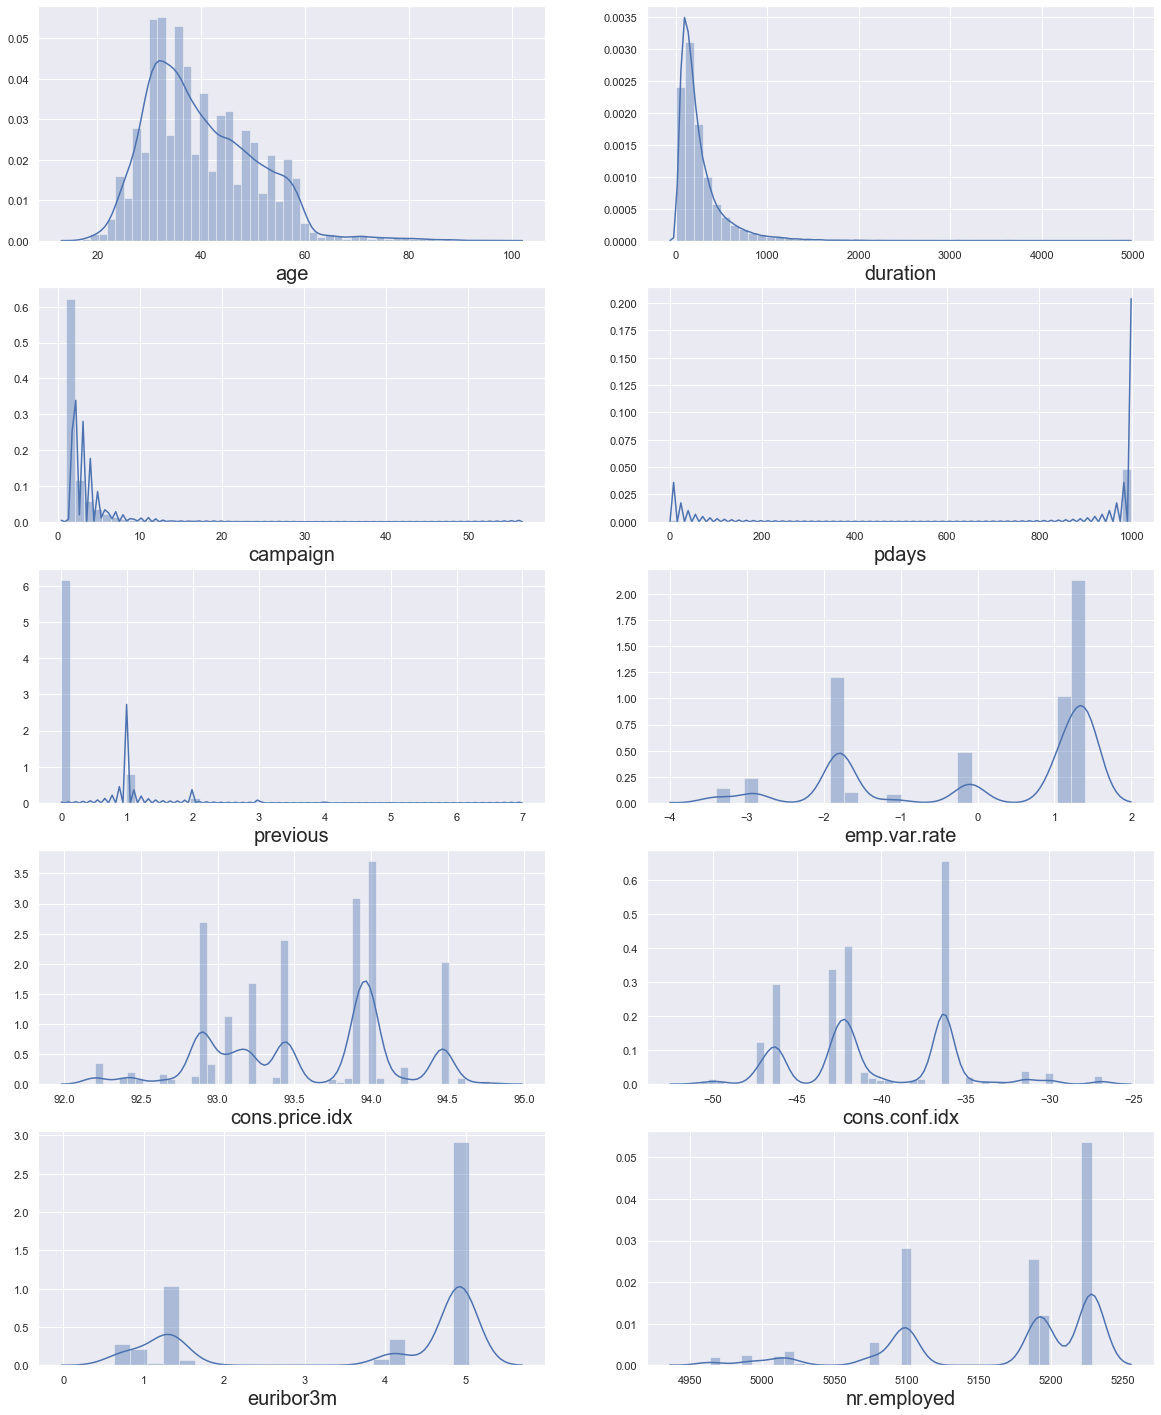

In [23]:
# data.hist(figsize=(20,15))
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_num:
    if plotnumber<=10 :
        ax = plt.subplot(5,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

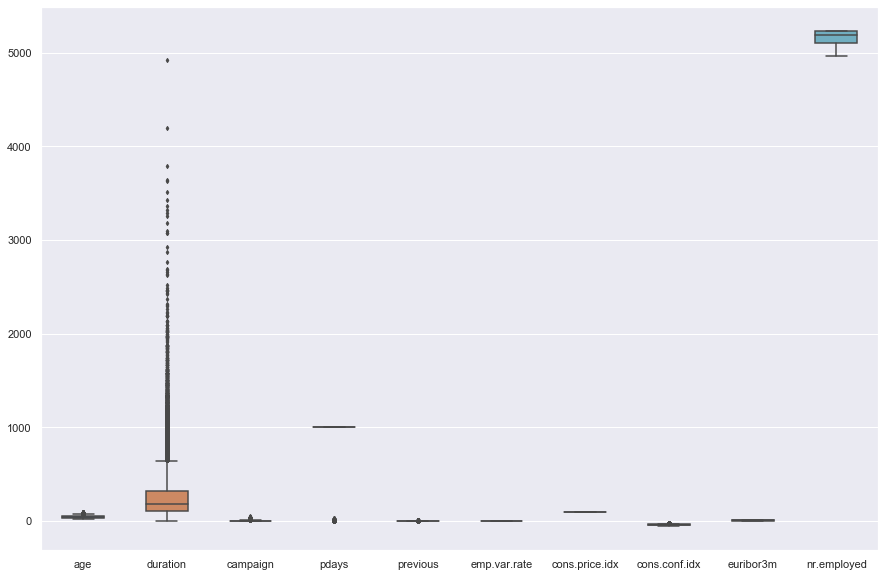

In [24]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data_num, width= 0.5,ax=ax,  fliersize=3)

#### The duration is already mentioned in the data overview that this field highely affects the target variable and should only be used for benchmark purposes. So there is no need to perform any outliers operation

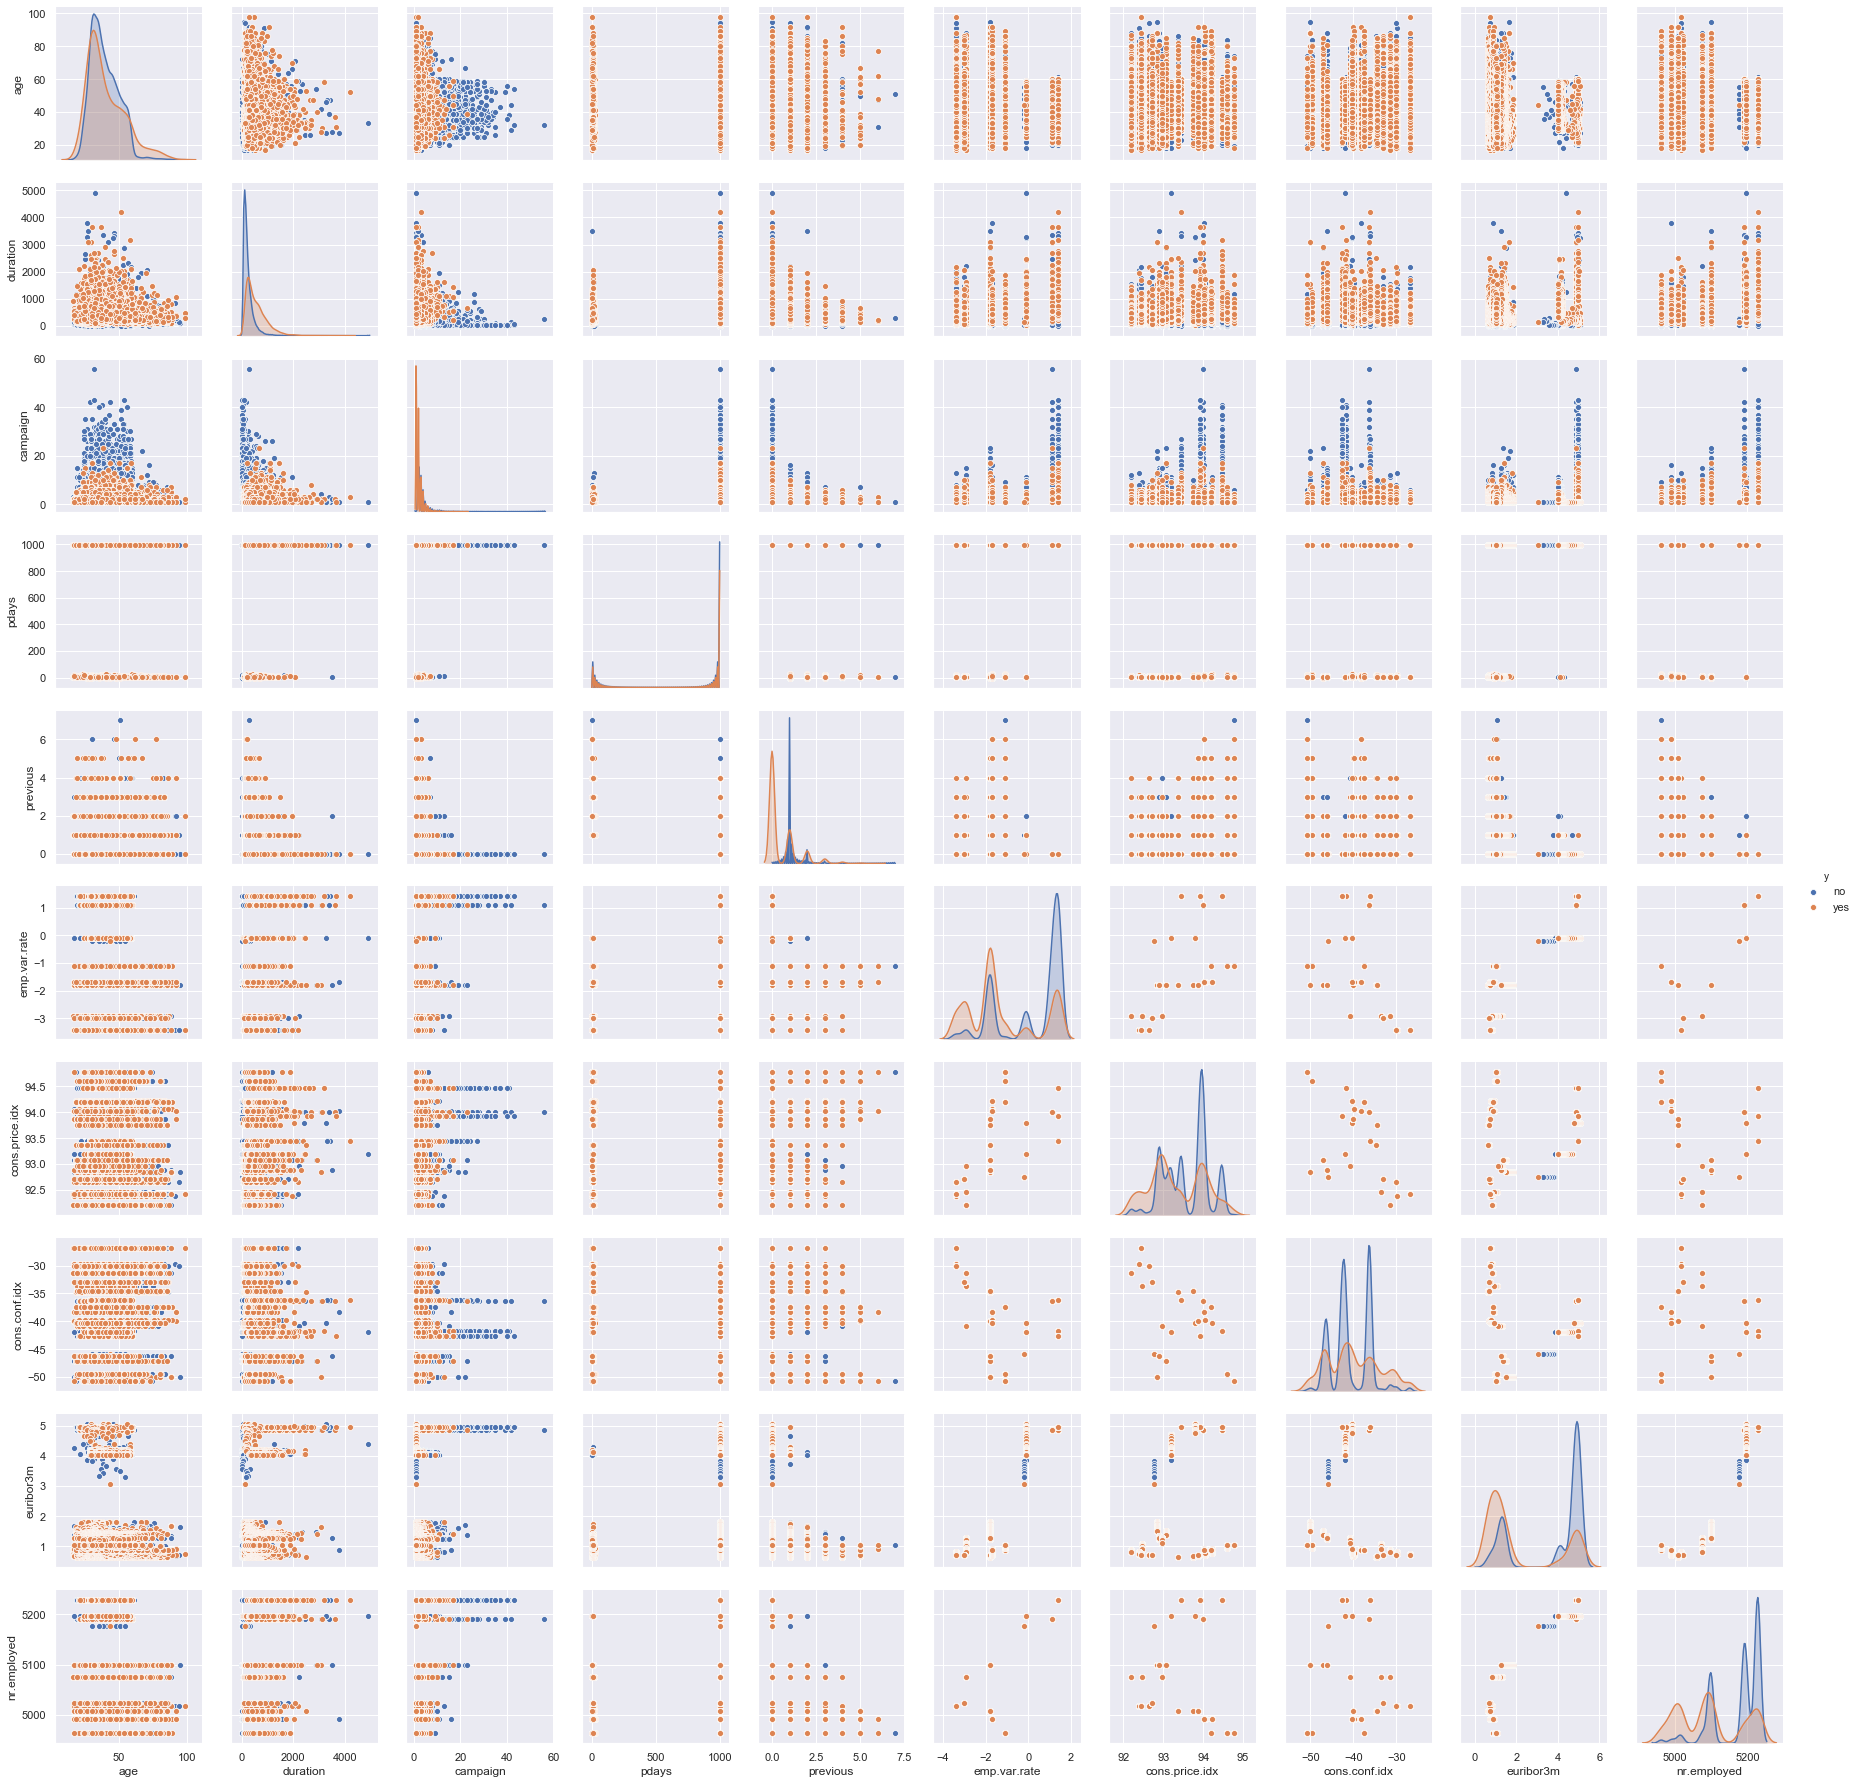

In [7]:
sns.pairplot(data, hue="y")

**As we can see in the above distribution also, that most of the features aren't a good indicator for which customer will subscribe and which customer will not.**

## 3) Correlation Check

In [7]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(np.array(data_num),i) for i in range(data_num.shape[1])]
vif["Features"] = data_num.columns

#########let's check the values#############
vif

,vif,Features
0,16.047296,age
1,2.011044,duration
2,1.921499,campaign
3,44.413175,pdays
4,2.001464,previous
5,28.910219,emp.var.rate
6,22561.123124,cons.price.idx
7,120.086975,cons.conf.idx
8,226.237349,euribor3m
9,26746.634212,nr.employed


Text(0.5, 1.05, 'Pearson correlation of Features')

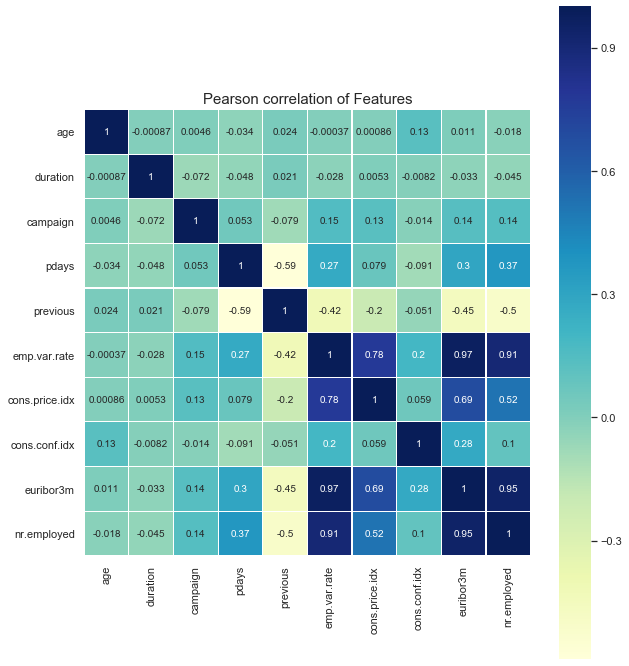

In [78]:
######### correlation matrix of numerical feature########
%matplotlib inline
corr = data.corr()

f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGnBu", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

#### Using VIF and Pearson correlation it is found out that nr.employed is very highly correlated, so we can remove this to get generalized model

In [7]:
data2=data.drop(['nr.employed','euribor3m','duration','day_of_week'], axis=1)
data2.head() ####### Droped out data

,age,job,marital,education,default,housing,loan,contact,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,1,999,0,nonexistent,1.1,93.994,-36.4,no
1,57,services,married,high.school,unknown,no,no,telephone,may,1,999,0,nonexistent,1.1,93.994,-36.4,no
2,37,services,married,high.school,no,yes,no,telephone,may,1,999,0,nonexistent,1.1,93.994,-36.4,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,1,999,0,nonexistent,1.1,93.994,-36.4,no
4,56,services,married,high.school,no,no,yes,telephone,may,1,999,0,nonexistent,1.1,93.994,-36.4,no


>#### From the above analysis its found out that 'nr.employed' and 'euribor3m' are highly correlated features.
>#### day_of_week is also dropped because its contibution is similar across all days.
>#### duration in the description itself written to remove

In [158]:
data2.shape

(41188, 17)

Text(0.5, 1.05, 'Pearson correlation of Features')

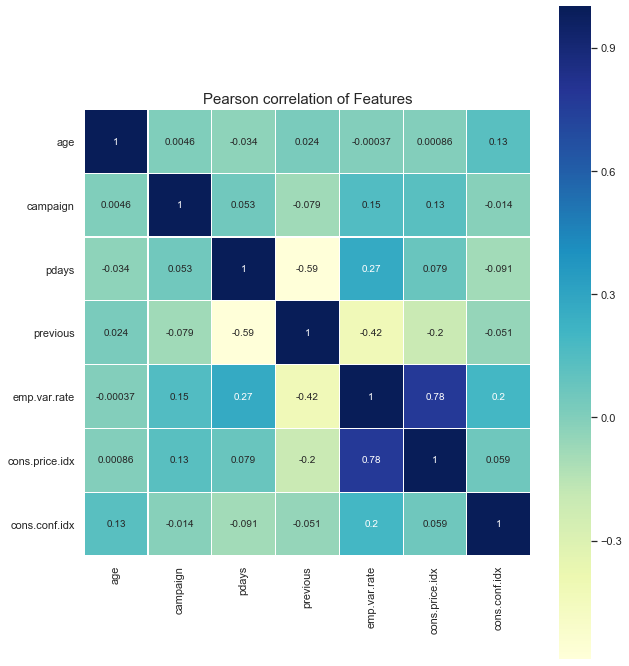

In [84]:
corr = data2.corr()

f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGnBu", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

## 4) Dealing with duplicate data

In [159]:
data2

,age,job,marital,education,default,housing,loan,contact,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,1,999,0,nonexistent,1.1,93.994,-36.4,no
1,57,services,married,high.school,unknown,no,no,telephone,may,1,999,0,nonexistent,1.1,93.994,-36.4,no
2,37,services,married,high.school,no,yes,no,telephone,may,1,999,0,nonexistent,1.1,93.994,-36.4,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,1,999,0,nonexistent,1.1,93.994,-36.4,no
4,56,services,married,high.school,no,no,yes,telephone,may,1,999,0,nonexistent,1.1,93.994,-36.4,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,1,999,0,nonexistent,-1.1,94.767,-50.8,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,1,999,0,nonexistent,-1.1,94.767,-50.8,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,2,999,0,nonexistent,-1.1,94.767,-50.8,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,1,999,0,nonexistent,-1.1,94.767,-50.8,yes


In [160]:
tt=data2[data2.duplicated(keep="last")]


In [161]:
tt.y.value_counts()

no     5229
yes      75
Name: y, dtype: int64

In [162]:
data4 = data2.drop_duplicates()
print('data4 shape:',data4.shape)
print('values count of data4: \n',data4['y'].value_counts())
print('values count of data2: \n',data2['y'].value_counts())

data4 shape: (35884, 17)
values count of data4: 
 no     31319
yes     4565
Name: y, dtype: int64
values count of data2: 
 no     36548
yes     4640
Name: y, dtype: int64


>#### Performing duplication drop here we able to minimize some amount imbalanceness in data

## 5)  Encode the categorical features 
#### The next big step for our data preprocessing is to encode all the categorical features so that we can apply models on the data.
**This article has nicely explained about response coding**

https://medium.com/@thewingedwolf.winterfell/response-coding-for-categorical-data-7bb8916c6dc1

In [174]:
data4 = data4.reset_index().drop("index",axis=1)
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35884 entries, 0 to 35883
Data columns (total 17 columns):
age               35884 non-null int64
job               35884 non-null object
marital           35884 non-null object
education         35884 non-null object
default           35884 non-null object
housing           35884 non-null object
loan              35884 non-null object
contact           35884 non-null object
month             35884 non-null object
campaign          35884 non-null int64
pdays             35884 non-null int64
previous          35884 non-null int64
poutcome          35884 non-null object
emp.var.rate      35884 non-null float64
cons.price.idx    35884 non-null float64
cons.conf.idx     35884 non-null float64
y                 35884 non-null object
dtypes: float64(3), int64(4), object(10)
memory usage: 4.7+ MB


In [175]:
X=data4.drop('y',axis=1)
cat_cols2=preprocess_data.categorical_column(X)
data_cat2=X[cat_cols2]

y=data4['y']
print("shape of x and y",X.shape,y.shape)
y.replace({"no":0, "yes":1}, inplace=True)


shape of x and y (35884, 16) (35884,)


In [176]:
from rav_utils import response_encoder

In [177]:
X_Encod=response_encoder.ResponseEncoder(cat_cols2, X, y)
print("Shape of the dataset after encoding: ", X_Encod.shape)

Encoding dataset
Shape of the dataset before encoding:  (35884, 16)
X feature :- job
X feature :- marital
X feature :- education
X feature :- default
X feature :- housing
X feature :- loan
X feature :- contact
X feature :- month
X feature :- poutcome
Shape of the dataset after encoding:  (35884, 25)


## 6) Class Distribution
**Now we will see into the class distribution to check its a balanced data or not.**

no     36548
yes     4640
Name: y, dtype: int64

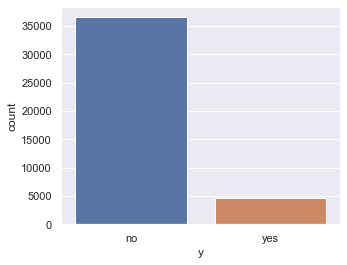

In [86]:
plt.figure(figsize=(5,4))
Y = data["y"]
ax=sns.countplot(x="y", data=data)
Y.value_counts()

>#### From this we can easily say that our data is purely imbalanced and its need perform some operation on top of that